In [1]:
## FOLLOWING SOLUTION MODEL GIVES ACCURACY OF ABOUT 0.80861

In [2]:
## load the datasets into R
train = read.csv("train.csv", na.strings = c("", NA))
test = read.csv("test.csv", na.strings = c("", NA))

In [3]:
## examine the datasets
str(train)

'data.frame':	891 obs. of  12 variables:
 $ PassengerId: int  1 2 3 4 5 6 7 8 9 10 ...
 $ Survived   : int  0 1 1 1 0 0 0 0 1 1 ...
 $ Pclass     : int  3 1 3 1 3 3 1 3 3 2 ...
 $ Name       : Factor w/ 891 levels "Abbing, Mr. Anthony",..: 109 191 358 277 16 559 520 629 417 581 ...
 $ Sex        : Factor w/ 2 levels "female","male": 2 1 1 1 2 2 2 2 1 1 ...
 $ Age        : num  22 38 26 35 35 NA 54 2 27 14 ...
 $ SibSp      : int  1 1 0 1 0 0 0 3 0 1 ...
 $ Parch      : int  0 0 0 0 0 0 0 1 2 0 ...
 $ Ticket     : Factor w/ 681 levels "110152","110413",..: 524 597 670 50 473 276 86 396 345 133 ...
 $ Fare       : num  7.25 71.28 7.92 53.1 8.05 ...
 $ Cabin      : Factor w/ 147 levels "A10","A14","A16",..: NA 82 NA 56 NA NA 130 NA NA NA ...
 $ Embarked   : Factor w/ 3 levels "C","Q","S": 3 1 3 3 3 2 3 3 3 1 ...


In [4]:
summary(train)

  PassengerId       Survived          Pclass     
 Min.   :  1.0   Min.   :0.0000   Min.   :1.000  
 1st Qu.:223.5   1st Qu.:0.0000   1st Qu.:2.000  
 Median :446.0   Median :0.0000   Median :3.000  
 Mean   :446.0   Mean   :0.3838   Mean   :2.309  
 3rd Qu.:668.5   3rd Qu.:1.0000   3rd Qu.:3.000  
 Max.   :891.0   Max.   :1.0000   Max.   :3.000  
                                                 
                                    Name         Sex           Age       
 Abbing, Mr. Anthony                  :  1   female:314   Min.   : 0.42  
 Abbott, Mr. Rossmore Edward          :  1   male  :577   1st Qu.:20.12  
 Abbott, Mrs. Stanton (Rosa Hunt)     :  1                Median :28.00  
 Abelson, Mr. Samuel                  :  1                Mean   :29.70  
 Abelson, Mrs. Samuel (Hannah Wizosky):  1                3rd Qu.:38.00  
 Adahl, Mr. Mauritz Nils Martin       :  1                Max.   :80.00  
 (Other)                              :885                NA's   :177    
     Sib

In [5]:
summary(test)

  PassengerId         Pclass     
 Min.   : 892.0   Min.   :1.000  
 1st Qu.: 996.2   1st Qu.:1.000  
 Median :1100.5   Median :3.000  
 Mean   :1100.5   Mean   :2.266  
 3rd Qu.:1204.8   3rd Qu.:3.000  
 Max.   :1309.0   Max.   :3.000  
                                 
                                        Name         Sex           Age       
 Abbott, Master. Eugene Joseph            :  1   female:152   Min.   : 0.17  
 Abelseth, Miss. Karen Marie              :  1   male  :266   1st Qu.:21.00  
 Abelseth, Mr. Olaus Jorgensen            :  1                Median :27.00  
 Abrahamsson, Mr. Abraham August Johannes :  1                Mean   :30.27  
 Abrahim, Mrs. Joseph (Sophie Halaut Easu):  1                3rd Qu.:39.00  
 Aks, Master. Philip Frank                :  1                Max.   :76.00  
 (Other)                                  :412                NA's   :86     
     SibSp            Parch             Ticket         Fare        
 Min.   :0.0000   Min.   :0.0000   P

In [6]:
## large number of cabin numbers are missing in both the datasets

In [7]:
## look at fraction of people survived of each gender and class
prop.table(table(train$Sex, train$Survived),1)

        
                 0         1
  female 0.2579618 0.7420382
  male   0.8110919 0.1889081

In [8]:
prop.table(table(train$Pclass, train$Survived),1)

   
            0         1
  1 0.3703704 0.6296296
  2 0.5271739 0.4728261
  3 0.7576375 0.2423625

In [9]:
aggregate(Survived ~ Pclass+Sex, data = train, FUN = function(x){sum(x)/length(x)})

Pclass,Sex,Survived
1,female,0.9680851
2,female,0.9210526
3,female,0.5000000
1,male,0.3688525
2,male,0.1574074
3,male,0.1354467


In [10]:
table(train$Parch, train$Survived)

   
      0   1
  0 445 233
  1  53  65
  2  40  40
  3   2   3
  4   4   0
  5   4   1
  6   1   0

In [15]:
## this doesn't tell much except that people having Parch greater than 3 or SibSp above 2 are not likely to survive

In [16]:
table(train$SibSp, train$Survived)

   
      0   1
  0 398 210
  1  97 112
  2  15  13
  3  12   4
  4  15   3
  5   5   0
  8   7   0

In [18]:
aggregate(Survived ~ SibSp+Sex, data = train, FUN = function(x){sum(x)/length(x)})

SibSp,Sex,Survived
0,female,0.78735632
1,female,0.75471698
2,female,0.76923077
3,female,0.36363636
4,female,0.33333333
5,female,0.00000000
8,female,0.00000000
0,male,0.16820276
1,male,0.31067961
2,male,0.20000000


In [19]:
aggregate(Survived ~ Parch+Sex, data = train, FUN = function(x){sum(x)/length(x)})

Parch,Sex,Survived
0,female,0.7886598
1,female,0.7666667
2,female,0.6122449
3,female,0.7500000
4,female,0.0000000
5,female,0.2500000
6,female,0.0000000
0,male,0.1652893
1,male,0.3275862
2,male,0.3225806


In [64]:
## Observe the age trends with survival factor, people with age between 20-42 are less likely to survive
library(ggplot2, warn.conflicts = F)

Warning message:
"Removed 177 rows containing non-finite values (stat_bin)."

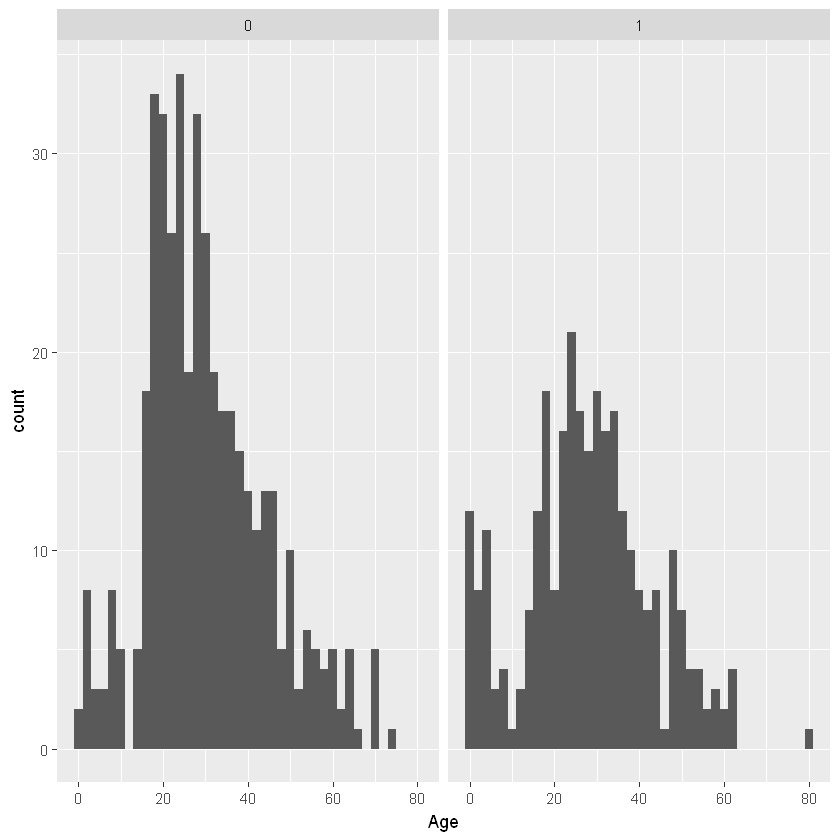

In [30]:
ggplot(train, aes(Age)) + geom_histogram(binwidth = 2) + facet_grid(. ~ Survived)

In [31]:
table(train$Survived,train$Fare>=100)

   
    FALSE TRUE
  0   535   14
  1   303   39

In [32]:
## people who paid more than $100 had more chances of surviving

In [34]:
## now lets combine the datasets to fill the NA values and for feature engineering
test$Survived = NA
total = rbind(train,test)

In [35]:
summary(total)

  PassengerId      Survived          Pclass     
 Min.   :   1   Min.   :0.0000   Min.   :1.000  
 1st Qu.: 328   1st Qu.:0.0000   1st Qu.:2.000  
 Median : 655   Median :0.0000   Median :3.000  
 Mean   : 655   Mean   :0.3838   Mean   :2.295  
 3rd Qu.: 982   3rd Qu.:1.0000   3rd Qu.:3.000  
 Max.   :1309   Max.   :1.0000   Max.   :3.000  
                NA's   :418                     
                               Name          Sex           Age       
 Connolly, Miss. Kate            :   2   female:466   Min.   : 0.17  
 Kelly, Mr. James                :   2   male  :843   1st Qu.:21.00  
 Abbing, Mr. Anthony             :   1                Median :28.00  
 Abbott, Mr. Rossmore Edward     :   1                Mean   :29.88  
 Abbott, Mrs. Stanton (Rosa Hunt):   1                3rd Qu.:39.00  
 Abelson, Mr. Samuel             :   1                Max.   :80.00  
 (Other)                         :1301                NA's   :263    
     SibSp            Parch            Ticket   

In [36]:
str(total)

'data.frame':	1309 obs. of  12 variables:
 $ PassengerId: int  1 2 3 4 5 6 7 8 9 10 ...
 $ Survived   : int  0 1 1 1 0 0 0 0 1 1 ...
 $ Pclass     : int  3 1 3 1 3 3 1 3 3 2 ...
 $ Name       : Factor w/ 1307 levels "Abbing, Mr. Anthony",..: 109 191 358 277 16 559 520 629 417 581 ...
 $ Sex        : Factor w/ 2 levels "female","male": 2 1 1 1 2 2 2 2 1 1 ...
 $ Age        : num  22 38 26 35 35 NA 54 2 27 14 ...
 $ SibSp      : int  1 1 0 1 0 0 0 3 0 1 ...
 $ Parch      : int  0 0 0 0 0 0 0 1 2 0 ...
 $ Ticket     : Factor w/ 929 levels "110152","110413",..: 524 597 670 50 473 276 86 396 345 133 ...
 $ Fare       : num  7.25 71.28 7.92 53.1 8.05 ...
 $ Cabin      : Factor w/ 186 levels "A10","A14","A16",..: NA 82 NA 56 NA NA 130 NA NA NA ...
 $ Embarked   : Factor w/ 3 levels "C","Q","S": 3 1 3 3 3 2 3 3 3 1 ...


In [37]:
prop.table(table(total$Embarked))


         C          Q          S 
0.20657995 0.09410865 0.69931140 

In [38]:
## Embarked column has only 2 missing values and almost 70% of time non-missing terms are "S" so the missing
## values can safely be assumed as "S"
total$Embarked = as.character(total$Embarked)
total$Embarked[is.na(total$Embarked)] = "S"
total$Embarked = factor(total$Embarked)

In [39]:
## Fare has only 1 missing value which can be replaced by the median
total$Fare = as.integer(total$Fare)
total$Fare[is.na(total$Fare)] = median(total$Fare, na.rm = T)

In [40]:
## Feature Engineering

In [41]:
## Let's deal with the Name column first. Observe that after surname we see a title is given to every person
## like Mr., Mrs., Master etc. Lets try to use this and extract some information out of it

In [44]:
## Observe that there is a comma(,) and a period(.) before and after the title. It can be used as a pattern
## to extract the title using str_extract()
total$Name = as.character(total$Name)

In [45]:
strsplit(total$Name[1],split = '[,.]') ## see that the 2nd word is what we want here

[[1]]
[1] "Braund"       " Mr"          " Owen Harris"

In [46]:
total$Title = sapply(total$Name,FUN = function(x){strsplit(x,split = '[,.]')[[1]][2]})
total$Title = sub(' ', '', total$Title)

In [47]:
table(total$Title)


        Capt          Col          Don         Dona           Dr     Jonkheer 
           1            4            1            1            8            1 
        Lady        Major       Master         Miss         Mlle          Mme 
           1            2           61          260            2            1 
          Mr          Mrs           Ms          Rev          Sir the Countess 
         757          197            2            8            1            1 

In [48]:
## few titles are rare and can be combined together
total$Title[total$Title %in% c('Capt', 'Col', 'Don', 'Major', 'Sir', 'Jonkheer')] = 'Sir'
total$Title[total$Title %in% c('Dona', 'Lady', 'the Countess')] = 'Lady'
total$Title[total$Title %in% c('Mlle', 'Mme')] = 'Ms'
total$Title = as.factor(total$Title)

In [49]:
table(total$Title)


    Dr   Lady Master   Miss     Mr    Mrs     Ms    Rev    Sir 
     8      3     61    260    757    197      5      8     10 

In [50]:
summary(total)

  PassengerId      Survived          Pclass          Name          
 Min.   :   1   Min.   :0.0000   Min.   :1.000   Length:1309       
 1st Qu.: 328   1st Qu.:0.0000   1st Qu.:2.000   Class :character  
 Median : 655   Median :0.0000   Median :3.000   Mode  :character  
 Mean   : 655   Mean   :0.3838   Mean   :2.295                     
 3rd Qu.: 982   3rd Qu.:1.0000   3rd Qu.:3.000                     
 Max.   :1309   Max.   :1.0000   Max.   :3.000                     
                NA's   :418                                        
     Sex           Age            SibSp            Parch            Ticket    
 female:466   Min.   : 0.17   Min.   :0.0000   Min.   :0.000   CA. 2343:  11  
 male  :843   1st Qu.:21.00   1st Qu.:0.0000   1st Qu.:0.000   1601    :   8  
              Median :28.00   Median :0.0000   Median :0.000   CA 2144 :   8  
              Mean   :29.88   Mean   :0.4989   Mean   :0.385   3101295 :   7  
              3rd Qu.:39.00   3rd Qu.:1.0000   3rd Qu.:0.000 

In [51]:
## looking at the size of family and their survival chances
total$FamilySize = total$SibSp + total$Parch + 1

In [52]:
## people with family members above 4 are not likely to survive
table(total$FamilySize[1:891],train$Survived)

    
       0   1
  1  374 163
  2   72  89
  3   43  59
  4    8  21
  5   12   3
  6   19   3
  7    8   4
  8    6   0
  11   7   0

In [53]:
## we can also separate families by extracting their surnames and attach familysize to it to make sure that
## two people of same surname belongs to the same family
total$Surname = sapply(total$Name, FUN=function(x) {strsplit(x, split='[,.]')[[1]][1]})
total$FamilyID = paste(as.character(total$FamilySize), total$Surname, sep="")

In [54]:
## there are too many levels in FamilyID. We need to reduce them
total$FamilyID[total$FamilySize == '1'] = 'Small'
famIDs = data.frame(table(total$FamilyID))
famIDs = famIDs[famIDs$Freq == 2,]
total$FamilyID[total$FamilyID %in% famIDs$Var1] = 'FamilySize2'
total$FamilyID = as.factor(total$FamilyID)

In [55]:
## By intuition, we can say that mothers and children were more likely to survive. Let's check it out
total$Mother = 0
total$Mother[total$Sex == 'female' & total$Parch > 0 & total$Age > 17 & total$Title == 'Mrs'] = 1
total$Mother = as.factor(total$Mother)
total$Child = 0
total$Child[total$Age <= 15] = 1
total$Child = total$Child

In [56]:
## convert the variables to factors
total[,"Survived"] = as.factor(total[,"Survived"])
total[,"Pclass"] = as.factor(total[,"Pclass"])
total[,"SibSp"] = as.factor(total[,"SibSp"])
total[,"Parch"] = as.factor(total[,"Parch"])
total[,"Embarked"] = as.factor(total[,"Embarked"])

In [63]:
## Age column has some missing values which need to be dealt with
## Missing values can be imputed using a number of methods like using "anova" method in rpart
library(rpart, warn.conflicts = F)

In [58]:
Agefit = rpart(Age ~ Pclass+Sex+SibSp+Parch+Fare+Embarked+Title+FamilySize+FamilyID,
               data=total[!is.na(total$Age),], method = "anova")

In [59]:
total$Age[is.na(total$Age)] = predict(Agefit, total[is.na(total$Age),])

In [60]:
## divide the dataset back into training set and testing set
trainNew = total[1:891,]
testNew = total[892:1309,]

In [62]:
## now build the model and make predictions
## cforest will take a little bit time to build the model
library(party, warn.conflicts = F)

In [65]:
mod.cforest = cforest(Survived ~ Pclass + Sex + Age + SibSp + Parch + Fare +
                        Embarked + Title + FamilySize + FamilyID + Mother + Child, data = trainNew, 
                        controls=cforest_unbiased(ntree=2000, mtry=3))

In [66]:
Prediction = predict(mod.cforest, testNew, OOB=TRUE, type = "response")

In [67]:
submit = data.frame(PassengerId = test$PassengerId, Survived = Prediction)

In [68]:
write.csv(submit, file = "submission.csv", row.names = FALSE)